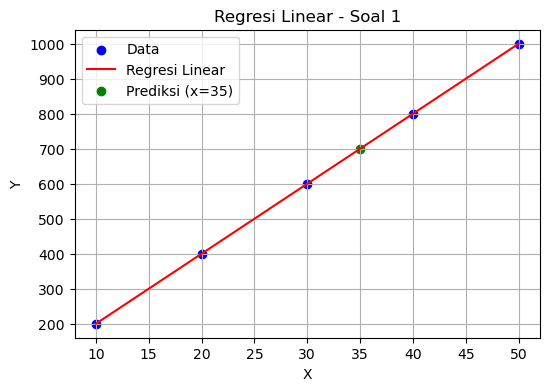

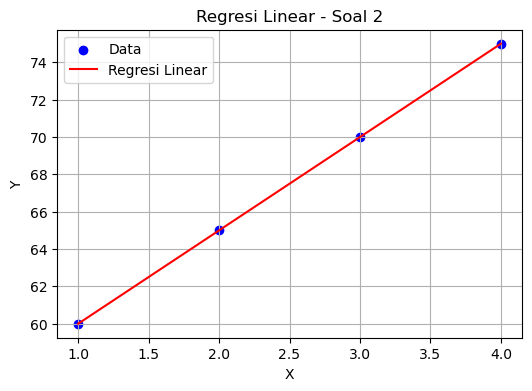

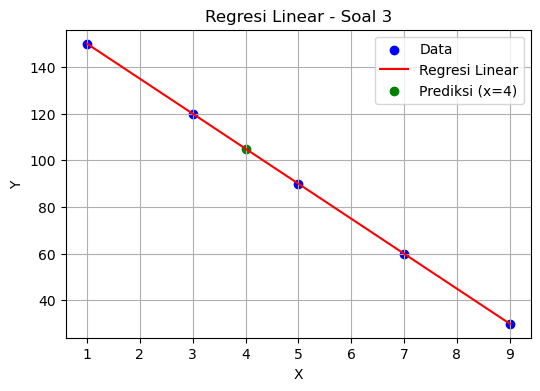

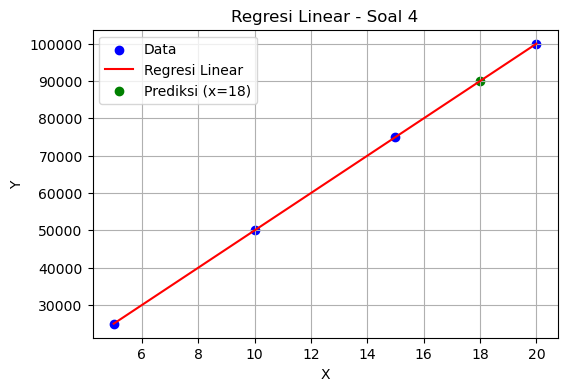


Soal 1
Persamaan: Y = 0.00 + 20.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): 1.0000
Prediksi untuk X=35: Y = 700.00

Soal 2
Persamaan: Y = 55.00 + 5.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): 1.0000

Soal 3
Persamaan: Y = 165.00 + -15.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): -1.0000
Prediksi untuk X=4: Y = 105.00

Soal 4
Persamaan: Y = 0.00 + 5000.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): 1.0000
Prediksi untuk X=18: Y = 90000.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset untuk masing-masing soal
datasets = [
    # Soal 1: Jumlah Pelanggan vs Pendapatan
    (np.array([10, 20, 30, 40, 50]).reshape(-1, 1), np.array([200, 400, 600, 800, 1000])),
    # Soal 2: Waktu Belajar vs Nilai Ujian
    (np.array([1, 2, 3, 4]).reshape(-1, 1), np.array([60, 65, 70, 75])),
    # Soal 3: Usia Kendaraan vs Harga Jual
    (np.array([1, 3, 5, 7, 9]).reshape(-1, 1), np.array([150, 120, 90, 60, 30])),
    # Soal 4: Jam Internet vs Biaya Pulsa
    (np.array([5, 10, 15, 20]).reshape(-1, 1), np.array([25000, 50000, 75000, 100000]))
]

# Prediksi untuk masing-masing soal
predictions = [35, None, 4, 18]

# Simpan hasil
results = []

for i, (X, y) in enumerate(datasets, 1):
    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    r_value = np.corrcoef(X.flatten(), y)[0, 1]  # Korelasi Pearson

    # Prediksi jika ada
    y_new = None
    if predictions[i - 1] is not None:
        x_new = np.array([[predictions[i - 1]]])
        y_new = model.predict(x_new)[0]

    # Visualisasi (opsional)
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Regresi Linear')
    if y_new is not None:
        plt.scatter(predictions[i - 1], y_new, color='green', label=f'Prediksi (x={predictions[i - 1]})')
    plt.title(f'Regresi Linear - Soal {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Simpan hasil numerik
    results.append({
        'soal': i,
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_squared,
        'korelasi_r': r_value,
        'prediksi_x': predictions[i - 1],
        'prediksi_y': y_new
    })

# Tampilkan semua hasil
for r in results:
    print(f"\nSoal {r['soal']}")
    print(f"Persamaan: Y = {r['intercept']:.2f} + {r['slope']:.2f}X")
    print(f"Koefisien Determinasi (R²): {r['r_squared']:.4f}")
    print(f"Koefisien Korelasi (r): {r['korelasi_r']:.4f}")
    if r['prediksi_x'] is not None:
        print(f"Prediksi untuk X={r['prediksi_x']}: Y = {r['prediksi_y']:.2f}")

In [4]:
from docx import Document
from docx.shared import Inches

# Membuat dokumen baru
doc = Document()

# Judul dan Identitas
doc.add_heading('Jawaban Kuis Regresi Linear', 0)
doc.add_paragraph('Nama: Taza Tri Fernanda Putri\nNIM: V3924012\nMata Kuliah: Statistika dan Probabilitas\nDosen Pengampu: Yusuf Fadlila Rachman S.Kom., M.Kom.\n')

# Ringkasan hasil
results = [
    {
        'soal': 1,
        'persamaan': 'Y = 0.00 + 20.00X',
        'r_squared': 1.0000,
        'r': 1.0000,
        'prediksi_x': 35,
        'prediksi_y': 700.00
    },
    {
        'soal': 2,
        'persamaan': 'Y = 55.00 + 5.00X',
        'r_squared': 1.0000,
        'r': 1.0000,
        'prediksi_x': None,
        'prediksi_y': None
    },
    {
        'soal': 3,
        'persamaan': 'Y = 165.00 - 15.00X',
        'r_squared': 1.0000,
        'r': -1.0000,
        'prediksi_x': 4,
        'prediksi_y': 105.00
    },
    {
        'soal': 4,
        'persamaan': 'Y = 0.00 + 5000.00X',
        'r_squared': 1.0000,
        'r': 1.0000,
        'prediksi_x': 18,
        'prediksi_y': 90000.00
    },
]

# Tabel hasil
doc.add_heading('Ringkasan Hasil:', level=1)
table = doc.add_table(rows=1, cols=6)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Soal'
hdr_cells[1].text = 'Persamaan'
hdr_cells[2].text = 'R²'
hdr_cells[3].text = 'r'
hdr_cells[4].text = 'Prediksi X'
hdr_cells[5].text = 'Prediksi Y'

for r in results:
    row_cells = table.add_row().cells
    row_cells[0].text = str(r['soal'])
    row_cells[1].text = r['persamaan']
    row_cells[2].text = f"{r['r_squared']:.4f}"
    row_cells[3].text = f"{r['r']:.4f}"
    row_cells[4].text = str(r['prediksi_x']) if r['prediksi_x'] is not None else '-'
    row_cells[5].text = f"{r['prediksi_y']:.2f}" if r['prediksi_y'] is not None else '-'

# Simpan dokumen
output_path = "/mnt/data/Jawaban_Kuis_Regresi_Linear_Taza.docx"
doc.save(output_path)

output_path


ModuleNotFoundError: No module named 'docx'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from docx import Document
from docx.shared import Inches

# Dataset dan prediksi
datasets = [
    # Soal 1
    (np.array([10, 20, 30, 40, 50]).reshape(-1, 1), np.array([200, 400, 600, 800, 1000]), 35),
    # Soal 2
    (np.array([1, 2, 3, 4]).reshape(-1, 1), np.array([60, 65, 70, 75]), None),
    # Soal 3
    (np.array([1, 3, 5, 7, 9]).reshape(-1, 1), np.array([150, 120, 90, 60, 30]), 4),
    # Soal 4
    (np.array([5, 10, 15, 20]).reshape(-1, 1), np.array([25000, 50000, 75000, 100000]), 18),
]

# Buat dokumen Word
doc = Document()
doc.add_heading('Jawaban Kuis Regresi Linear', 0)
doc.add_paragraph('Nama: Taza Tri Fernanda Putri\nNIM: V3924012\nMata Kuliah: Statistika dan Probabilitas\nDosen Pengampu: Yusuf Fadlila Rachman S.Kom., M.Kom.\n')

# Proses tiap soal
for i, (X, y, pred_x) in enumerate(datasets, 1):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    r = np.corrcoef(X.flatten(), y)[0, 1]
    slope = model.coef_[0]
    intercept = model.intercept_

    doc.add_heading(f'Soal {i}', level=1)
    doc.add_paragraph(f'Persamaan regresi: Y = {intercept:.2f} + {slope:.2f}X')
    doc.add_paragraph(f'Koefisien Determinasi (R²): {r2:.4f}')
    doc.add_paragraph(f'Koefisien Korelasi (r): {r:.4f}')

    if pred_x is not None:
        y_new = model.predict(np.array([[pred_x]]))[0]
        doc.add_paragraph(f'Prediksi untuk X = {pred_x}: Y = {y_new:.2f}')
    else:
        y_new = None

    # Simpan grafik
    plt.figure()
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Regresi Linear')
    if y_new is not None:
        plt.scatter(pred_x, y_new, color='green', label='Prediksi')
    plt.title(f'Regresi Linear - Soal {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    img_path = f"/mnt/data/grafik_soal_{i}.png"
    plt.savefig(img_path)
    plt.close()

    # Masukkan gambar ke dokumen
    doc.add_picture(img_path, width=Inches(5.5))

# Simpan dokumen akhir
final_doc_path = "/mnt/data/Jawaban_Kuis_Regresi_Linear_Taza_dengan_Grafik.docx"
doc.save(final_doc_path)

final_doc_path


ModuleNotFoundError: No module named 'docx'

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\Regresi_Linear_Soal_1.png'

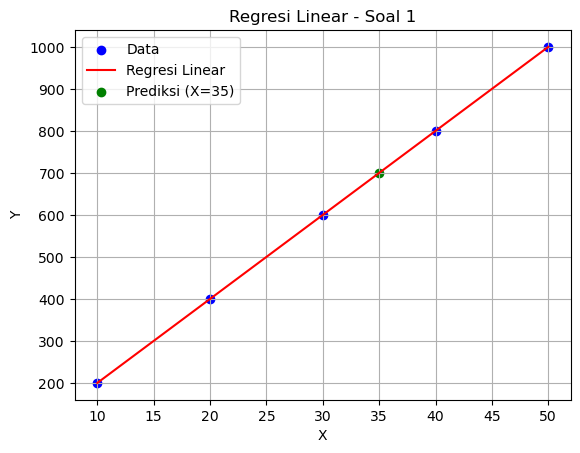

In [6]:
# Hanya menyimpan grafik dari regresi linear tanpa membuat dokumen Word

# Dataset dan prediksi
datasets = [
    # Soal 1
    (np.array([10, 20, 30, 40, 50]).reshape(-1, 1), np.array([200, 400, 600, 800, 1000]), 35),
    # Soal 2
    (np.array([1, 2, 3, 4]).reshape(-1, 1), np.array([60, 65, 70, 75]), None),
    # Soal 3
    (np.array([1, 3, 5, 7, 9]).reshape(-1, 1), np.array([150, 120, 90, 60, 30]), 4),
    # Soal 4
    (np.array([5, 10, 15, 20]).reshape(-1, 1), np.array([25000, 50000, 75000, 100000]), 18),
]

# Simpan semua grafik ke file
image_paths = []

for i, (X, y, pred_x) in enumerate(datasets, 1):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure()
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Regresi Linear')

    if pred_x is not None:
        y_new = model.predict(np.array([[pred_x]]))[0]
        plt.scatter(pred_x, y_new, color='green', label=f'Prediksi (X={pred_x})')

    plt.title(f'Regresi Linear - Soal {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    
    img_path = f"/mnt/data/Regresi_Linear_Soal_{i}.png"
    plt.savefig(img_path)
    plt.close()

    image_paths.append(img_path)

image_paths  # Daftar gambar yang dihasilkan untuk diunduh user


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

datasets = [
    (np.array([10, 20, 30, 40, 50]).reshape(-1, 1), np.array([200, 400, 600, 800, 1000]), 35),
    (np.array([1, 2, 3, 4]).reshape(-1, 1), np.array([60, 65, 70, 75]), None),
    (np.array([1, 3, 5, 7, 9]).reshape(-1, 1), np.array([150, 120, 90, 60, 30]), 4),
    (np.array([5, 10, 15, 20]).reshape(-1, 1), np.array([25000, 50000, 75000, 100000]), 18),
]

output_folder = "./output_grafik"
os.makedirs(output_folder, exist_ok=True)

for i, (X, y, pred_x) in enumerate(datasets, 1):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure()
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Regresi Linear')
    
    if pred_x is not None:
        y_new = model.predict(np.array([[pred_x]]))[0]
        plt.scatter(pred_x, y_new, color='green', label=f'Prediksi (X={pred_x})')

    plt.title(f'Regresi Linear - Soal {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

    img_path = f"{output_folder}/Regresi_Linear_Soal_{i}.png"
    plt.savefig(img_path)
    plt.close()

    print(f"Grafik Soal {i} disimpan di: {img_path}")


Grafik Soal 1 disimpan di: ./output_grafik/Regresi_Linear_Soal_1.png
Grafik Soal 2 disimpan di: ./output_grafik/Regresi_Linear_Soal_2.png
Grafik Soal 3 disimpan di: ./output_grafik/Regresi_Linear_Soal_3.png
Grafik Soal 4 disimpan di: ./output_grafik/Regresi_Linear_Soal_4.png


Persamaan regresi linear: Y = 0.00 + 20.00X
Prediksi pendapatan untuk 35 pelanggan: Y = 700.00 ribu


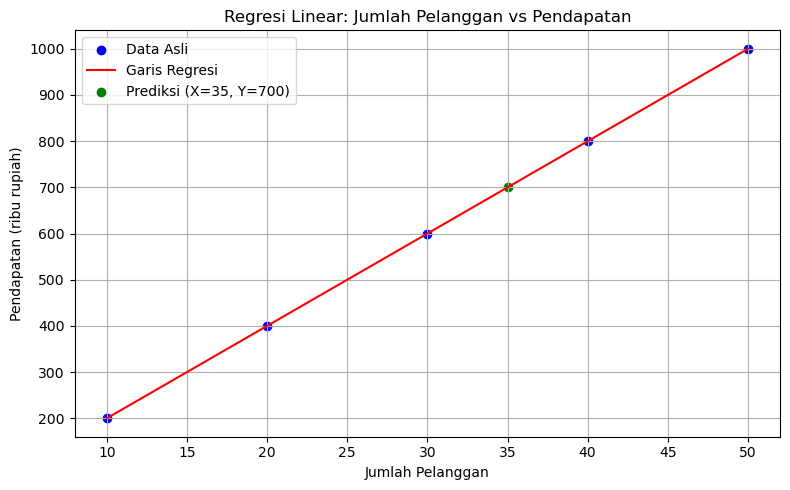

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
y = np.array([200, 400, 600, 800, 1000])

# Model regresi
model = LinearRegression()
model.fit(X, y)

# Ambil koefisien dan intercept
a = model.intercept_
b = model.coef_[0]

# Cetak model regresi
print(f"Persamaan regresi linear: Y = {a:.2f} + {b:.2f}X")

# Prediksi untuk X = 35
x_pred = np.array([[35]])
y_pred = model.predict(x_pred)[0]
print(f"Prediksi pendapatan untuk 35 pelanggan: Y = {y_pred:.2f} ribu")

# Visualisasi grafik
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', label='Garis Regresi')
plt.scatter(35, y_pred, color='green', label=f'Prediksi (X=35, Y={y_pred:.0f})')
plt.title('Regresi Linear: Jumlah Pelanggan vs Pendapatan')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Pendapatan (ribu rupiah)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Persamaan regresi: Y = 55.00 + 5.00X


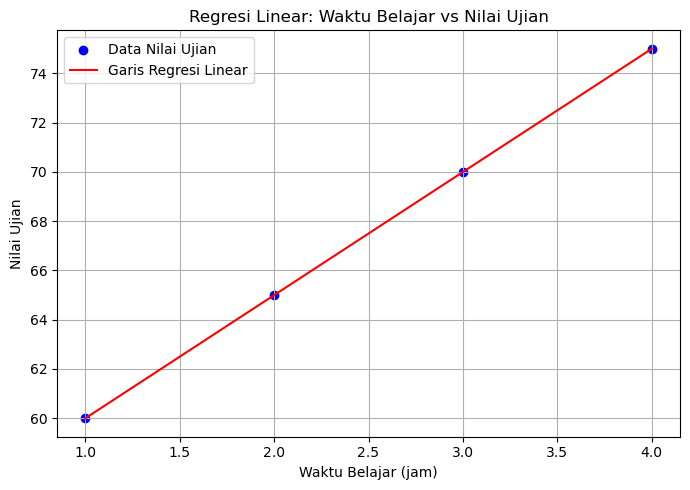

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dari tabel
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([60, 65, 70, 75])

# Buat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Ambil koefisien (b) dan intercept (a)
b = model.coef_[0]
a = model.intercept_

# Tampilkan persamaan regresi
print(f"Persamaan regresi: Y = {a:.2f} + {b:.2f}X")

# Buat grafik
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color='blue', label='Data Nilai Ujian')
plt.plot(X, model.predict(X), color='red', label='Garis Regresi Linear')
plt.title('Regresi Linear: Waktu Belajar vs Nilai Ujian')
plt.xlabel('Waktu Belajar (jam)')
plt.ylabel('Nilai Ujian')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


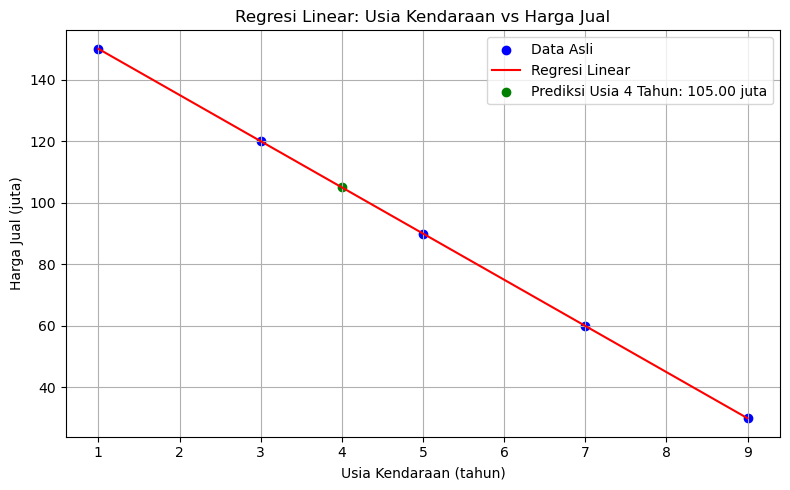

(165.0, -15.0, 105.0, None)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
usia = np.array([1, 3, 5, 7, 9])
harga = np.array([150, 120, 90, 60, 30])

# Menghitung rata-rata
x_bar = np.mean(usia)
y_bar = np.mean(harga)

# Menghitung b (slope)
b = np.sum((usia - x_bar) * (harga - y_bar)) / np.sum((usia - x_bar)**2)

# Menghitung a (intercept)
a = y_bar - b * x_bar

# Membuat persamaan regresi linear
def prediksi(x):
    return a + b * x

# Prediksi harga untuk usia 4 tahun
usia_4 = 4
harga_prediksi_4 = prediksi(usia_4)

# Plot data dan regresi
x_regresi = np.linspace(min(usia), max(usia), 100)
y_regresi = prediksi(x_regresi)

plt.figure(figsize=(8, 5))
plt.scatter(usia, harga, color='blue', label='Data Asli')
plt.plot(x_regresi, y_regresi, color='red', label='Regresi Linear')
plt.scatter(usia_4, harga_prediksi_4, color='green', label=f'Prediksi Usia 4 Tahun: {harga_prediksi_4:.2f} juta')
plt.title('Regresi Linear: Usia Kendaraan vs Harga Jual')
plt.xlabel('Usia Kendaraan (tahun)')
plt.ylabel('Harga Jual (juta)')
plt.legend()
plt.grid(True)
plt.tight_layout()

a, b, harga_prediksi_4, plt.show()


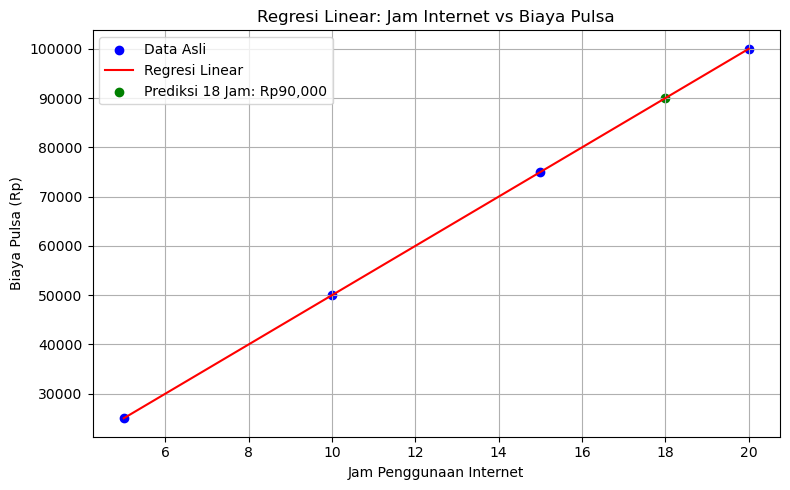

(0.0, 5000.0, 90000.0, None)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
jam_internet = np.array([5, 10, 15, 20])
biaya_pulsa = np.array([25000, 50000, 75000, 100000])

# Menghitung jumlah data
n = len(jam_internet)

# Menghitung koefisien regresi
sum_x = np.sum(jam_internet)
sum_y = np.sum(biaya_pulsa)
sum_x2 = np.sum(jam_internet**2)
sum_xy = np.sum(jam_internet * biaya_pulsa)

b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
a = (sum_y - b * sum_x) / n

# Persamaan regresi
def prediksi(x):
    return a + b * x

# Prediksi untuk 18 jam
x_prediksi = 18
y_prediksi = prediksi(x_prediksi)

# Plot data dan regresi
x_regresi = np.linspace(min(jam_internet), max(jam_internet), 100)
y_regresi = prediksi(x_regresi)

plt.figure(figsize=(8, 5))
plt.scatter(jam_internet, biaya_pulsa, color='blue', label='Data Asli')
plt.plot(x_regresi, y_regresi, color='red', label='Regresi Linear')
plt.scatter(x_prediksi, y_prediksi, color='green', label=f'Prediksi 18 Jam: Rp{y_prediksi:,.0f}')
plt.title('Regresi Linear: Jam Internet vs Biaya Pulsa')
plt.xlabel('Jam Penggunaan Internet')
plt.ylabel('Biaya Pulsa (Rp)')
plt.legend()
plt.grid(True)
plt.tight_layout()

a, b, y_prediksi, plt.show()


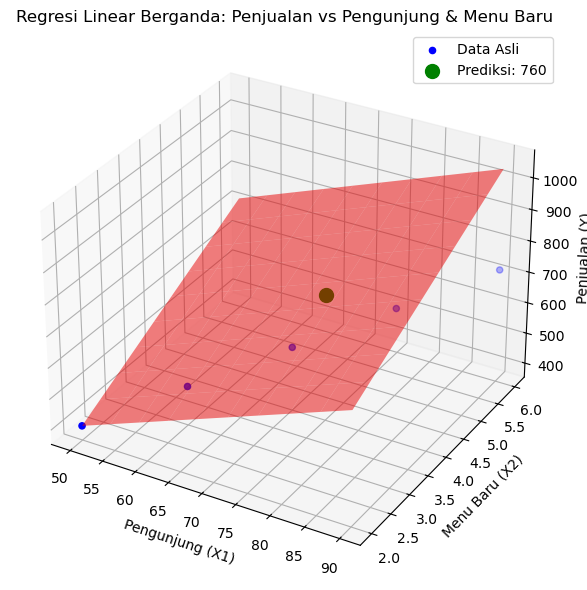

(-160, 8, 80, 760)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
X1 = np.array([50, 60, 70, 80, 90])  # Pengunjung
X2 = np.array([2, 3, 4, 5, 6])       # Menu Baru
Y = np.array([400, 480, 560, 640, 720])  # Penjualan

# Koefisien dari hasil perhitungan manual
b1 = 8
b2 = 80
a = -160

# Fungsi prediksi
def prediksi(x1, x2):
    return a + b1 * x1 + b2 * x2

# Prediksi penjualan jika pengunjung=75 dan menu baru=4
x1_pred = 75
x2_pred = 4
y_pred = prediksi(x1_pred, x2_pred)

# Membuat meshgrid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(np.linspace(50, 90, 10), np.linspace(2, 6, 10))
y_grid = prediksi(x1_grid, x2_grid)

# Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Titik data asli
ax.scatter(X1, X2, Y, color='blue', label='Data Asli')
# Permukaan regresi
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
# Titik prediksi
ax.scatter(x1_pred, x2_pred, y_pred, color='green', s=100, label=f'Prediksi: {y_pred:.0f}')

ax.set_xlabel('Pengunjung (X1)')
ax.set_ylabel('Menu Baru (X2)')
ax.set_zlabel('Penjualan (Y)')
ax.set_title('Regresi Linear Berganda: Penjualan vs Pengunjung & Menu Baru')
ax.legend()

plt.tight_layout()
plt.show()

a, b1, b2, y_pred
